<a href="https://colab.research.google.com/github/ef1s/ML-Econ441b-SY/blob/main/Econ441b-A9-SY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters= 5
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

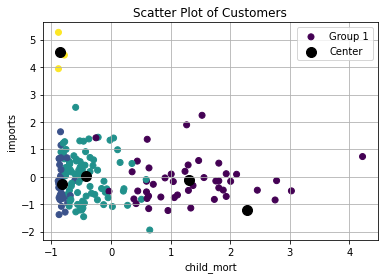

In [11]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 3


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [12]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters=k, n_init=30)
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

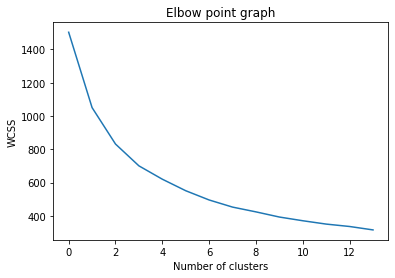

In [13]:
plt.plot(WCSSs)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow point graph')
plt.show()

In [14]:
k = 2
kmeans = KMeans(n_clusters=k).fit(X_scaled) 


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


From an economic perspective, interpreting the results is easier when we choose the number of clusters to be 2. This is because we can cluster all the countries into either developed or developing countries, which aligns with the common classification used in the field of economics. Moreover, although increasing the number of clusters may improve the model performance, it is difficult to identify a clear inflection point that would serve as a meaningful cut-off for the additional clusters. Therefore, it is more appropriate to choose a smaller number of clusters that aligns with our understanding of the economic context.

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [15]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [16]:
output = pd.concat([preds,names],axis=1)
output

,0,country
0,1,Afghanistan
1,0,Albania
2,0,Algeria
3,1,Angola
4,0,Antigua and Barbuda
...,...,...
162,1,Vanuatu
163,0,Venezuela
164,0,Vietnam
165,1,Yemen


In [17]:
print(output[output[0]==0]['country'])

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
158         United Kingdom
159          United States
160                Uruguay
163              Venezuela
164                Vietnam
Name: country, Length: 99, dtype: object


In [18]:
print(output[output[0]==1]['country'])

0      Afghanistan
3           Angola
12      Bangladesh
17           Benin
19         Bolivia
          ...     
155         Uganda
161     Uzbekistan
162        Vanuatu
165          Yemen
166         Zambia
Name: country, Length: 68, dtype: object


The analysis shows that countries in group 1 have a higher child mortality rate than those in group 0. Additionally, it is observed that group 0 countries tend to have a stronger economy when compared to group 1 countries.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [19]:
Q6df = pd.concat([preds,X], axis=1)

In [20]:
Q6df.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [21]:
Q6df.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


# Q7.) Write an observation about the descriptive statistics.

Upon analyzing the average statistics, it can be observed that group 0 countries have higher levels of exports, health, imports, income, life expectancy, total fertility, and GDP compared to the group 1 countries. In contrast, group 0 countries have lower rates of child mortality and inflation. This further supports the notion that group 0 countries have more attributes that align with those of developed countries. However, an interesting observation is that group 0 countries exhibit a higher standard deviation of exports, imports, income, and GDP compared to the group 1 countries. This implies that there is greater variability or spread of data from the mean in these indicators in group 0 countries. It may reflect the common wealth gap problem often observed in developed countries.